In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the data file
housing = pd.read_csv(r"C:\Users\HP\Downloads\Advanced_Regression_Assignment\train.csv")

### 1. Data Understanding and Exploration

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
housing.isnull().sum().values

array([   0,    0,    0,  259,    0,    0, 1369,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,  872,    8,    0,    0,    0,   37,   37,   38,
         37,    0,   38,    0,    0,    0,    0,    0,    0,    1,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,  690,   81,   81,   81,    0,    0,   81,   81,    0,
          0,    0,    0,    0,    0,    0, 1453, 1179, 1406,    0,    0,
          0,    0,    0,    0], dtype=int64)

In [5]:
housing.drop(['Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1, inplace=True)

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [8]:
# all numeric (float and int) variables in the dataset
housing_numeric = housing.select_dtypes(include=['float64', 'int64'])
housing_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


Here, although the variable 'MSSubClass' is numeric (int), we'd rather treat it as categorical since it has only 16 discrete values. Also, we do not want 'Id'.
We will remove the 'MoSold' and 'YrSold' as there are month and year.

In [9]:
# dropping MSSubClass and Id
housing_numeric = housing_numeric.drop(['MSSubClass','Id','MoSold','YrSold'], axis=1)
housing_numeric.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,2,460,298,0,0,0,0,0,0,181500
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,2,608,0,42,0,0,0,0,0,223500
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,3,642,0,35,272,0,0,0,0,140000
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,3,836,192,84,0,0,0,0,0,250000


This is quite hard to read, and we can rather plot correlations between variables. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [10]:
# correlation matrix
cor = housing_numeric.corr()
cor

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
LotFrontage,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,...,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.351799
LotArea,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,...,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843
OverallQual,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,...,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.790982
OverallCond,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,...,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.077856
YearBuilt,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,...,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.522897
YearRemodAdd,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,...,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.507101
MasVnrArea,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,...,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,0.477493
BsmtFinSF1,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,...,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420
BsmtFinSF2,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,...,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378
BsmtUnfSF,0.132644,-0.002618,0.308159,-0.136841,0.149040,0.181133,0.114442,-0.495251,-0.209294,1.000000,...,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479


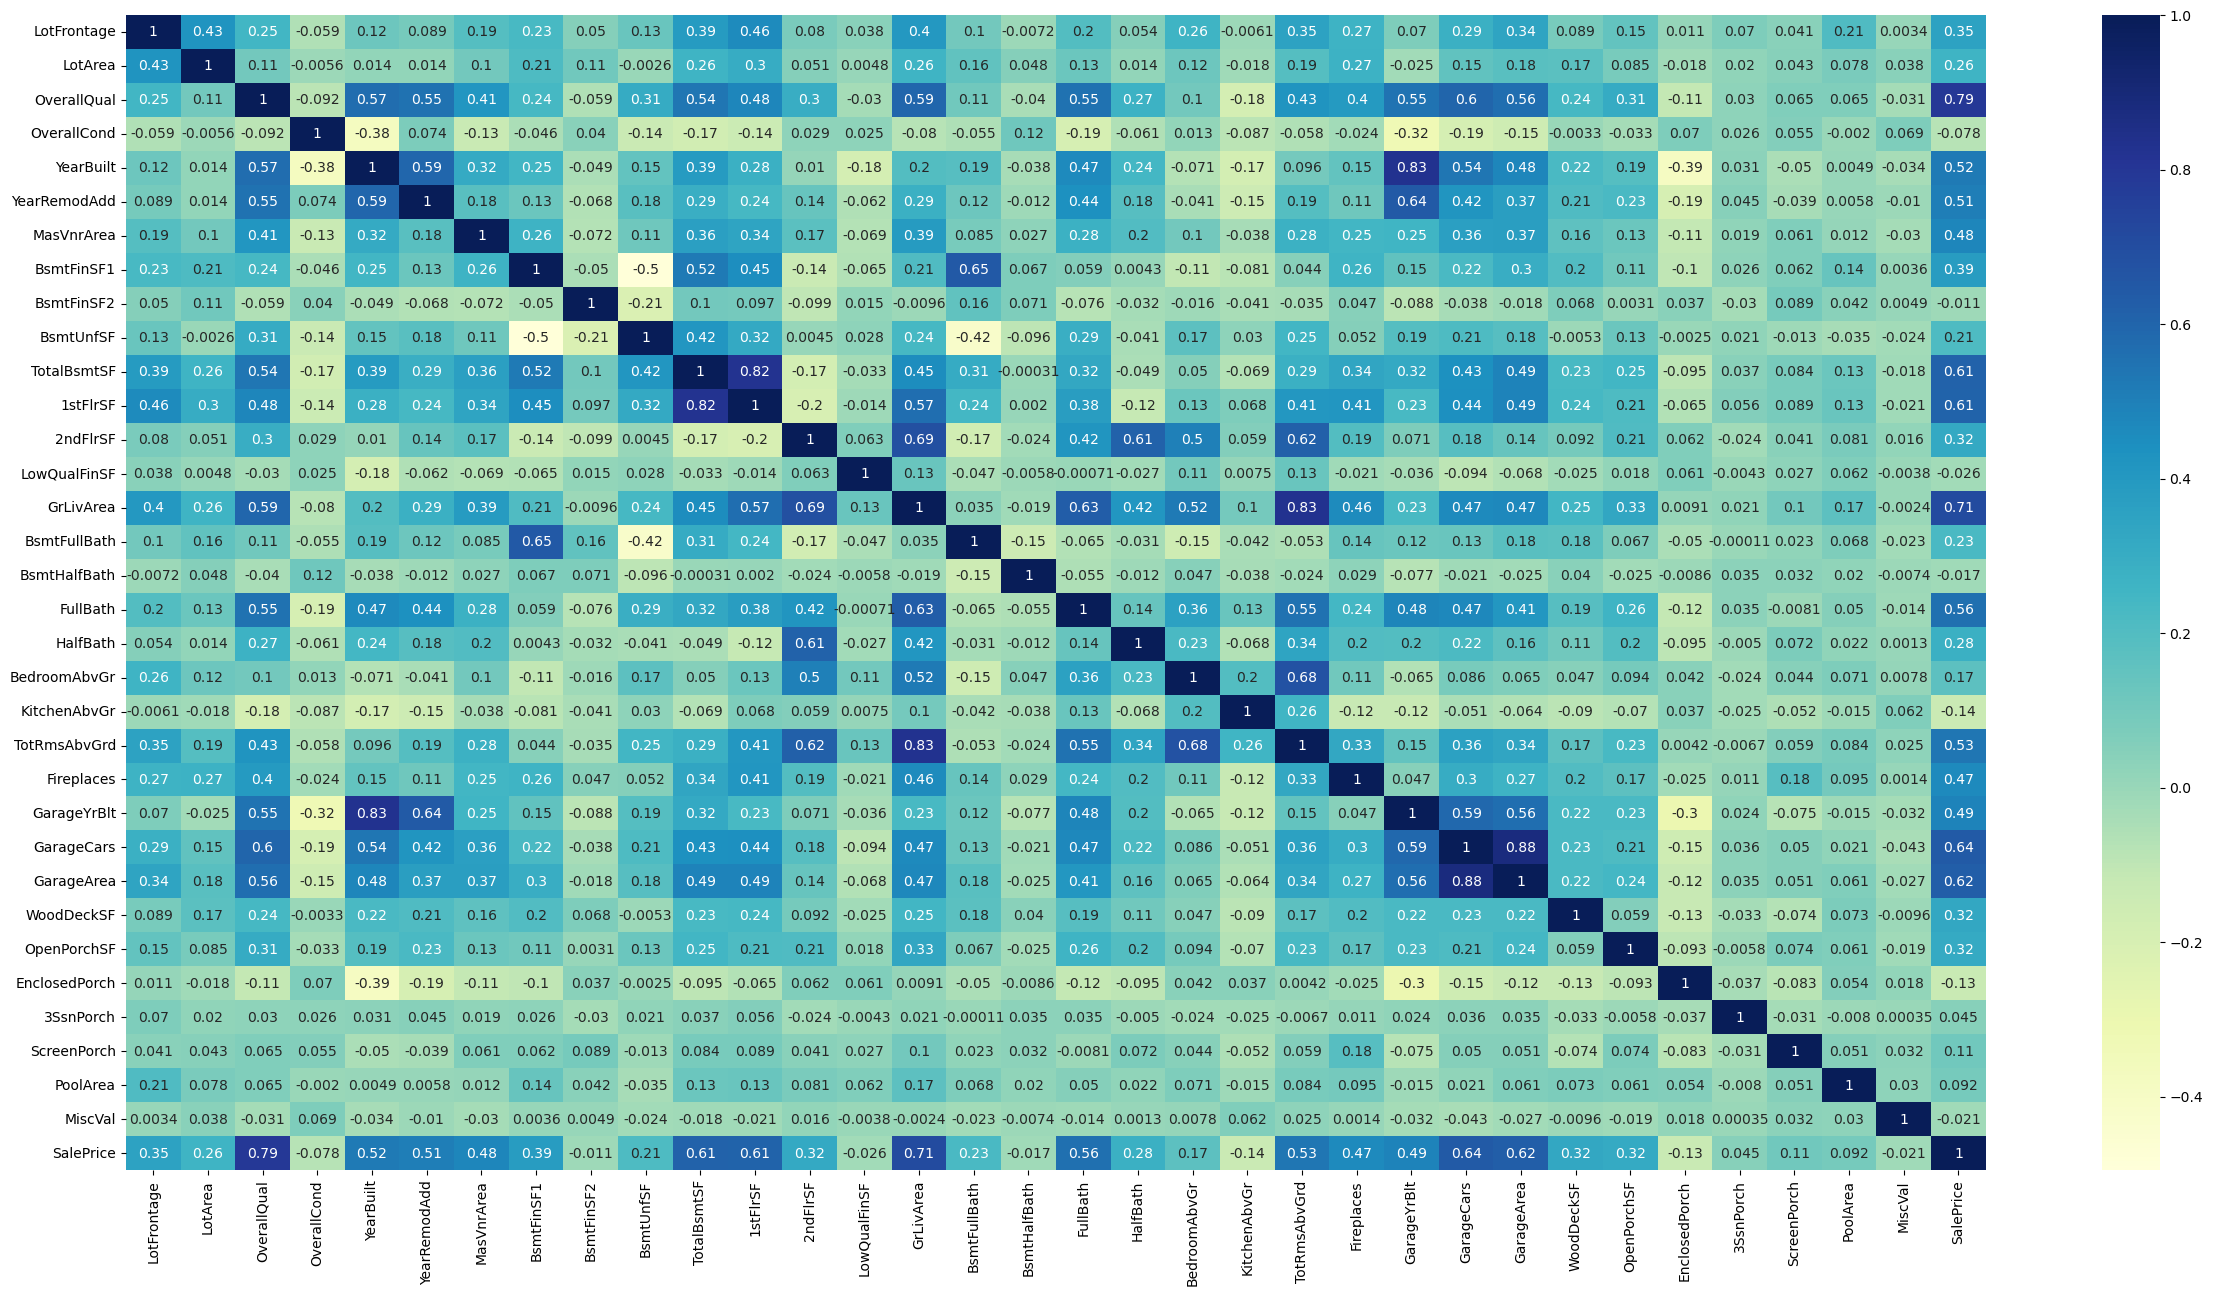

In [11]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,15))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


### 2. Data Cleaning

In [12]:
# change datatype of 'YrSold' and 'MoSold'
housing[['MoSold','YrSold','MSSubClass','GarageYrBlt']] = housing[['MoSold','YrSold','MSSubClass','GarageYrBlt']].astype(object)


In [13]:
# outliers
housing.describe()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,421.610009,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,1.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,730.500000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,1460.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


In [14]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [15]:
# imputing missing values
housing['LotFrontage'] = housing['LotFrontage'].fillna(housing['LotFrontage'].median())
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(housing['MasVnrArea'].median())
housing['BsmtQual'] = housing['BsmtQual'].fillna(housing['BsmtQual'].mode()[0])
housing['BsmtCond'] = housing['BsmtCond'].fillna(housing['BsmtCond'].mode()[0])[0]
housing['BsmtExposure'] = housing['BsmtExposure'].fillna(housing['BsmtExposure'].mode()[0])
housing['BsmtFinType1'] = housing['BsmtFinType1'].fillna(housing['BsmtFinType1'].mode()[0])
housing['BsmtFinType2'] = housing['BsmtFinType2'].fillna(housing['BsmtFinType2'].mode()[0])
housing['Electrical'] = housing['Electrical'].fillna(housing['Electrical'].mode()[0])
housing['GarageType'] = housing['GarageType'].fillna(housing['GarageType'].mode()[0])
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna(housing['GarageYrBlt'].mode()[0])
housing['GarageFinish'] = housing['GarageFinish'].fillna(housing['GarageFinish'].mode()[0])
housing['GarageQual'] = housing['GarageQual'].fillna(housing['GarageQual'].mode()[0])
housing['GarageCond'] = housing['GarageCond'].fillna(housing['GarageCond'].mode()[0])

In [16]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### 3. Data Preparation¶

In [17]:
# creating dummy variables for categorical variables

# subset all categorical variables
housing_categorical = housing.select_dtypes(include=['object'])
housing_categorical.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Typ,Attchd,RFn,TA,TA,Y,2,2008,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Typ,Attchd,RFn,TA,TA,Y,5,2007,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Typ,Attchd,RFn,TA,TA,Y,9,2008,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Typ,Detchd,Unf,TA,TA,Y,2,2006,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Typ,Attchd,RFn,TA,TA,Y,12,2008,WD,Normal


In [18]:
housing_categorical.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [19]:
housing.GarageCond.value_counts()

GarageCond
TA    1407
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

In [20]:
housing.CentralAir.value_counts()

CentralAir
Y    1365
N      95
Name: count, dtype: int64

In [21]:
housing.Heating.value_counts()

Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64

In [22]:
housing.BsmtCond.value_counts()

BsmtCond
TA    1460
Name: count, dtype: int64

In [23]:
housing.RoofMatl.value_counts()

RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64

In [24]:
housing.Condition2.value_counts()

Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64

In [25]:
housing.Utilities.value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

In [26]:
housing.Street.value_counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

These below columns doesnt show variation in their value counts so we will drop these columns from dataset:


Street, Utilities, BsmtCond

In [27]:
housing_categorical.drop(['Street','Utilities','BsmtCond'], axis= 1, inplace =True)

In [28]:
# also drop these categorical columns from main dataset
housing.drop(['Street','Utilities','BsmtCond'], axis= 1, inplace =True)

In [29]:
# convert into dummies - one hot encoding
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True, dtype=int)
housing_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [30]:
# split into X and y
X = housing.iloc[:,1:-1] # predictors in variable X

y = housing['SalePrice'] # response variable in Y

In [31]:
# drop categorical variables 
X = X.drop(list(housing_categorical.columns), axis=1)

In [32]:
# concat dummy variables with X
X = pd.concat([X, housing_dummies], axis=1)

In [33]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=250)

In [34]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

### 3. Model Building and Evaluation

### Ridge Regression

In [35]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [36]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [37]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 5.89367748e+02  2.68599255e+03  8.66792850e+03  2.68282458e+03
  1.86215626e+03  3.11085726e+03  3.75659788e+03  2.50769936e+03
  7.32133727e+02  9.25894003e+02  3.80890325e+03  5.76647277e+03
  4.69941590e+03 -3.57099596e+02  8.11317261e+03  2.51922124e+03
  9.60376183e+01  4.01405774e+03  1.89262030e+03  8.27976126e+01
 -1.74006963e+03  4.22772889e+03  3.66672594e+03  1.24682570e+03
  4.38170747e+03  3.09165056e+03  1.95157844e+03  9.80372347e+02
 -1.08801620e+02  9.84013985e+02  1.08074160e+03  7.27674836e+01
 -4.45947798e+01 -5.61067085e+02  1.98972385e+02  4.70179822e+01
  4.26235177e+02  5.85430642e+02  6.76751466e+02  4.11060046e+02
 -8.60127388e+02 -2.92308438e+02 -1.07672206e+03 -1.67310697e+03
 -1.70980409e+03 -4.03972111e+02 -1.05627848e+03  6.81671438e+02
  2.01690378e+02  1.32616170e+03 -1.00516065e+03  3.81244842e+02
 -2.20199686e+03 -3.22085099e+02  1.58082123e+03  5.82647730e+02
  1.48604019e+03  2.20428718e+03 -1.15376382e+03 -4.64507682e+02
 -2.41056514e+02  6.66239

In [38]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8837876837845918
0.8544523538902588
726264237.571111
936659757.6541592


### Lasso

In [39]:
lasso = Lasso()

# cross validation
model_cv_ = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [40]:
# Printing the best hyperparameter alpha
print(model_cv_.best_params_)

{'alpha': 500}


In [41]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised

alpha = 500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=500)

In [42]:
lasso.coef_

array([-0.00000000e+00,  3.64633578e+03,  1.30755190e+04,  4.54833819e+03,
        7.07766792e+03,  2.94566933e+03,  2.42321634e+03,  2.45555174e+03,
        0.00000000e+00, -0.00000000e+00,  2.71397373e+03,  0.00000000e+00,
        0.00000000e+00, -1.57587967e+03,  3.17415779e+04,  2.99909111e+03,
        0.00000000e+00,  2.08608668e+03,  0.00000000e+00, -1.67889024e+03,
       -3.25535834e+03,  0.00000000e+00,  1.28345776e+03,  1.18821150e+03,
        5.21364735e+03,  0.00000000e+00,  8.20597112e+02,  1.90739064e+02,
       -0.00000000e+00,  4.83732140e+02,  4.01774908e+02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        8.95169051e+01, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -1.24962423e+03, -1.48316754e+03,
       -1.77120913e+03, -0.00000000e+00, -1.15051096e+03,  0.00000000e+00,
        0.00000000e+00,  1.96800079e+03, -4.13880406e+00,  0.00000000e+00,
       -1.29816579e+03,  

In [43]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9237908247522404
0.8451361135161412
476266202.75466937
996613646.8739783


**Lets observe the coefficients after regularization**

In [44]:
betas = pd.DataFrame(index=X.columns)

In [45]:
betas.rows = X.columns

In [46]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [47]:
pd.set_option('display.max_rows', None)
betas.sort_values(by=['Ridge'], ascending = False).head(10)

,Ridge,Lasso
OverallQual,8667.928499,13075.518990
GrLivArea,8113.172612,31741.577933
Neighborhood_NoRidge,6034.304155,6799.498313
1stFlrSF,5766.472772,0.000000
Neighborhood_NridgHt,5638.737104,6160.742017
RoofMatl_WdShngl,5176.638900,19850.734194
2ndFlrSF,4699.415900,0.000000
GarageCars,4381.707469,5213.647348
BsmtExposure_Gd,4334.150143,5548.031664
TotRmsAbvGrd,4227.728887,0.000000


In [48]:
pd.set_option('display.max_rows', None)
betas.sort_values(by=['Lasso'], ascending = False).head(10)

,Ridge,Lasso
GrLivArea,8113.172612,31741.577933
RoofMatl_CompShg,1737.391844,31670.033250
RoofMatl_WdShngl,5176.638900,19850.734194
RoofMatl_Tar&Grv,385.818176,19584.415001
RoofMatl_WdShake,602.140276,13090.029114
OverallQual,8667.928499,13075.518990
YearBuilt,1862.156263,7077.667917
Neighborhood_NoRidge,6034.304155,6799.498313
RoofMatl_Membran,745.853044,6621.268268
Neighborhood_NridgHt,5638.737104,6160.742017
